# Support Vector Classifiers <img src="https://i.imgur.com/9y2NKWY.png" align="right" width=80/>


This notebook serves as a practical extension to session *IV*. In this notebook, we will reiterate some of the points we covered in the session, in addition to a few more concepts. We will walk you through applying `sklearn.svm.SVC()` on the water quality dataset to predict whether or not a body of water is considered good or bad given its contents. You will be given full freedom to experiment with the model's hyperparameters. Your goal is to find the set of hyperparameters that result in the best test accuracy. You are free to apply any of the hyperparameter search methods learned in class. Do your research!

At the end of this notebook you will (hopefully):

*   Know the intuition behind SVMs.
*   Know the effect of the regularization parameter C on your model.
*   Be able to choose the right kernel for a given non-linear classification problem.
*   know what the gamma hyperparameter is.
*   have fun experimenting with your SVM.
*   Be able to tune hyperparameters using grid search or randomized search (optional).
*   Understand what a confusion matrix is.
*   Understand precision and recall.
*   Be able to evaluate your classifier.

The dataset used in this notebook is clean and easy to work with, which is almost impossible in the real world. This notebook is concerned with the machine learning model and its evaluation, and does not delve into the other stages of the data science pipeline.<br><br>

<center><img src="https://i.imgur.com/YO0B0Xx.png" width=800/></center>




## What Is a Support Vector Machine?

<p align = "justify">An SVM is a non-probabilistic supervised machine learning algorithm. SVMs are  used primarily in binary (2 categories) classification, but they can be used in multi-class classification, or even regression. A support vector machine is a linear model, meaning that it requires the data to be separable by a straight line; as shown in the figure below.</p>

<center><img src="https://i1.wp.com/cmdlinetips.com/wp-content/uploads/2021/02/Linearly_Separable_Data_Example.png?fit=539,234&ssl=1" width=600/><br>
Figure: linearly separable vs non-linearly separable data
</center>

## How Does an SVM Discriminate? 

<p align = "justify">SVMs rely on a deterministic approach for classifying data rather than a probabilistic one. They separate the feature space and return the class associated with the space which the sample originated from, as opposed to modeling the probability distribution of the classes. To do this, SVMs try to find the hyperplane whose distance to the nearest sample of each class is the largest. Thus, ensuring that the model is not biased towards any of the classes.

<center><img src="https://www.mdpi.com/sensors/sensors-19-05219/article_deploy/html/images/sensors-19-05219-g004-550.jpg" width=600/>
<br> 
Figure: possible decision boundaries(left) vs the decision boundary of an SVM (right).
</center>

As seen in the figure, some decision boundaries like those seen on the left have a higher risk of misclassifying new data, since samples may be classified as one class even though they are closer to the other. Hence why the best decision boundary is one which is not biased towards any of the classes. Furthermore, we can see that it is called a support vector machine because it depends on the samples lying on the margin (support vectors) to find the hyperplane.</p>

## Application

Now that you have some intution as to how SVMs classify, we will now move on to the practical aspect of this notebook. This section will walk you through implementing and evaluating a water quality classifier, step by step. Let's begin by familiarizing ourselves with the dataset.

## The Water Quality Dataset

<p align = "justify">The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
* PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
* Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
* Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
* Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
* Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
* Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
* Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
* THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
* The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. <font color="red"> Potability: </font>
* Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.



Your task is to make an SVM that tells drinkable water from undrinkable water using the other 9 attributes.</p>

In [ ]:
!gdown 17uGsTbirflfJu-Jswl-COyEda1v-Hmeh
!gdown 1ci2JihrTsAVMOiTw-93_C0BJL9pKfQST
\
!gdown 1X2mI_YB353YVf1nx6Qa72qVcK1z4Gf-9

Downloading...
From: https://drive.google.com/uc?id=17uGsTbirflfJu-Jswl-COyEda1v-Hmeh
To: /content/water_train.csv
100% 364k/364k [00:00<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ci2JihrTsAVMOiTw-93_C0BJL9pKfQST
To: /content/water_test.csv
100% 158k/158k [00:00<00:00, 83.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1X2mI_YB353YVf1nx6Qa72qVcK1z4Gf-9
To: /content/sample_submission.csv
100% 6.56k/6.56k [00:00<00:00, 12.4MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


<mark>Task: Read the *water_train.csv* file to a variable called train_df and *water_test.csv* to a variable called test_df. Show the first 5 samples of the train_df dataset to get a sense of what our data looks like.
</mark>

In [ ]:
train_df = pd.read_csv('water_train.csv')
test_df = pd.read_csv('water_test.csv')
train_df.head(5)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.040392,200.637576,12999.144804,6.696356,356.870041,394.017732,11.100407,43.625910,3.017796,0
1,7.344976,182.306942,5689.804405,6.764350,373.872785,360.184473,20.483902,73.488981,3.418763,0
2,8.447404,163.949905,19583.057349,6.433184,334.655886,547.023830,18.238711,45.668318,5.218307,1
3,10.386133,200.891192,17982.387256,5.845502,338.999274,336.279707,14.319411,62.156686,4.921341,0
4,9.011480,167.918922,34865.357682,3.139553,400.691774,385.409608,16.574190,50.526551,4.270801,0


---

<mark>Task: Show a statistical summary of train_df.</mark>

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               1959 non-null   float64
 1   Hardness         2293 non-null   float64
 2   Solids           2293 non-null   float64
 3   Chloramines      2293 non-null   float64
 4   Sulfate          1759 non-null   float64
 5   Conductivity     2293 non-null   float64
 6   Organic_carbon   2293 non-null   float64
 7   Trihalomethanes  2175 non-null   float64
 8   Turbidity        2293 non-null   float64
 9   Potability       2293 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 179.3 KB


---

In [ ]:
train_df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1959.000000,2293.000000,2293.000000,2293.000000,1759.000000,2293.000000,2293.000000,2175.000000,2293.000000,2293.000000
mean,7.062583,196.441433,22080.919968,7.103711,334.020701,427.332102,14.208704,66.169554,3.974248,0.390318
std,1.635477,33.137162,8796.359003,1.616028,41.476643,80.872468,3.229233,16.402546,0.794813,0.487928
min,0.000000,73.492234,728.750830,0.352000,129.000000,181.483754,4.466772,0.738000,1.450000,0.000000
25%,6.069490,175.982447,15758.740621,6.106567,307.878421,367.988784,12.053627,55.294253,3.440859,0.000000
50%,7.022952,196.615992,21035.106855,7.116897,333.499203,423.736784,14.136699,66.087038,3.954715,0.000000
75%,8.059373,216.762159,27267.981861,8.105638,360.219048,481.318803,16.381195,77.229565,4.508705,1.000000
max,14.000000,317.338124,61227.196008,13.043806,481.030642,753.342620,27.006707,120.030077,6.739000,1.000000


<mark>Task: Show the sum of NaN values in each column of train_df.</mark>

In [ ]:
train_df.isna().sum()

ph                 334
Hardness             0
Solids               0
Chloramines          0
Sulfate            534
Conductivity         0
Organic_carbon       0
Trihalomethanes    118
Turbidity            0
Potability           0
dtype: int64

---

<mark>Task: Store train_df without the *Potability* column in a variable called X_train. Store the Potability column in a variable called y_train. Store the test set without the *id* column in a variable called X_test.</mark>

In [ ]:
test_df.head(5)

,id,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,926,8.846282,188.415001,17734.949625,6.057868,317.150545,419.395569,17.115447,60.251578,2.925038
1,959,6.138785,158.422129,20129.978820,6.812143,352.229961,373.843620,13.417813,80.731097,4.677290
2,1844,9.393892,252.739248,13150.207459,7.166592,NaN,368.834604,14.397393,50.775293,3.048566
3,1054,5.961302,182.108995,23926.078825,6.188790,364.975499,567.526159,7.791638,58.174825,4.919585
4,484,6.139743,168.444214,23894.136010,9.494582,318.026087,494.129125,19.116022,60.264767,3.841222


In [ ]:
X_test = test_df.drop("id",axis=1)


In [ ]:
X_train=train_df.drop("Potability",axis=1)
y_train=train_df["Potability"]





---



<p align = "justify"> Since we have noticed in a previous step that some columns contain NaN values, we would need to impute them (fill the missing values with the mean/median/etc.) 
</p>

<mark>Task: Fit a SimpleImputer on X_train and use it to transform X_train and X_test (The X_train and X_test variables should contain the transformed output after this task) .</mark>

In [ ]:
my_imputer = SimpleImputer()
my_imputer.fit(X_train)
X_train= my_imputer.transform(X_train)
X_test = my_imputer.transform(X_test)

---

<p align = "justify"> In the next step, we will scale our features to ensure they have the same scale. Featue scaling is an important step to perform before giving your data to the model, since different attributes may be measured on different scales and may have different ranges of values (e.g. room temprature in celsius, weight in KG, distance in meters). 

Notice how SVMs rely on the sample's location in space. without scaling, some features will have a higher impact on that distance than others.
</p>

<mark> Task Fit a MinMaxScaler on X_train and use it to transform X_train and X_test (The X_train and X_test variables should contain the transformed output after this task).

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

---

## Model

Remember the import statement we used previously: "`from sklearn.svm import SVC`". This imports [sklearn's own SVM implementation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

<p align = "justify">SVC stands for support vector classifier, which is an SVM that is used in calssification. Its constructor takes many optional parameters, the most important of them are:

*   C
  *   The regularization parameter. It is associated with the penalty of misclassified samples. a smaller C means that the penalty of misclassification is small which allows for a bigger margin between classes at the expense of a greater number of misclassifications. on the other hand, a larger C, means that the model tolerates misclassified samples less. Theoritically, when C approaches $\infty$, the SVM becomes a hard margin SVM, meaning that no misclassification is allowed. In this case, our model will break if the data is not 100% linearly separable. The optimal C is determined by [cross-validation](https://www.geeksforgeeks.org/cross-validation-machine-learning/) or trial and error.
<center><img src="https://www.learnopencv.com/wp-content/uploads/2018/07/svm-parameter-c-example.png" width=600/>
<br> 
Figure: Small C value vs large C value.
</center>



*   kernel
  *   The choice of kernel function to use. Kernel functions are used to map the original dataset (linear/nonlinear) into a higher dimensional space to make it a linear dataset. The choices of kernel functions in sklearn.svm.SVC are:
      *   linear
          *   The normal linear function used with linearly separable data.
      *   poly
          *   the polynomial kernel. Higher degree polynomial kernels allow a more flexible decision boundary. the "degree" hyperparameter lets you specify the polynomial degree. 
<center><img src="https://www.researchgate.net/profile/Asa_Ben-Hur/publication/41896604/figure/fig10/AS:667041182785544@1536046419481/The-effect-of-the-degree-of-a-polynomial-kernel-Higher-degree-polynomial-kernels-allow.png" width=600/>
<br> 
Figure: The effect of the polynomial's degree on decision boundaries.
</center>

      *   rbf
          *   The Radial Basis Function Kernel is the most popular kernel used, and it is the default kernel used in sklearn's SVC. It projects the input feature space onto an infinite feature space due to the infinite series expansion of the exponential function.
<center>
<img src="https://i.imgur.com/9GnrfWa.png" width=600/>
</center>

      *   sigmoid
          * Similar to the sigmoid function used in logistic regression. It is the least used kernel in SVMs. an SVM model using a sigmoid kernel function is equivalent to a two-layer, perceptron neural network.
<center><img src="https://www.eric-kim.net/eric-kim-net/posts/1/imgs/nonsep_svm_sigmoid.png" width=600/>
</center>

*   gamma
      *   Used with non linear kernels to decide how far the influence of a single training example reaches. With low values meaning 'far', and high values meaning 'close'. This has a considerable impact on the shape of the decision boundary.
<center><img src="https://vitalflux.com/wp-content/uploads/2020/07/C-Values-Page-3-1024x832.png" width=600/>
<br> 
Figure: The effect of different gamma values on a decision boundary.
</center>
</p>

Now that you are familiar with the model's hyperparameters. it is time for you to finally experiment with your own model. 

Before you start experimenting with your model, there is a few important points to consider.



1.   The classes are highly imbalanced (Bad water bodies are much more than good water bodies).

2.   As learned in the previous session, tuning your hyperparameters on the test set will overfit your model on the test set! Therefore **cross-validation** is important.

3.   Using [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) can also misleading results when the dataset is [imbalanced](https://machinelearningmastery.com/what-is-imbalanced-classification/). The reason is that it picks the samples for the training and validation sets randomly. Therefore, the sampling will be biased towards the dominant class. Therefore the use of [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) is a must. It preserves the distribution of the classes. Learn about thr difference [here](https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/).

The next cell initializes your cross-validator. It does 5-fold cross validation. It shuffles the data before splitting. The random state is fixed for reproducible results.

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

<mark> Task: Train a basic SVC without any hyperparameter tuning, and get the average cross-validation accuracy.

**Hint:** Learn how to perform cross-validation from [here](https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/).

In [ ]:
model_basic = SVC()

scores = []
for train_index, test_index in skf.split(X_train, y_train):
  X_cv_train, X_cv_valid = X_train[train_index], X_train[test_index]
  y_cv_train, y_cv_valid = y_train[train_index], y_train[test_index]

  #TODO: fit your model 
  model_basic.fit(X_cv_train, y_cv_train)

  #TODO: get the accuracy of your model on valid data and append it to scores
  scores.append(model_basic.score(X_cv_valid, y_cv_valid))

print("Your model's validation accuracy is %2.3f%%" % ((sum(scores)/5)*100))

Your model's validation accuracy is 65.983%


<mark> Task: Find the optimal set of hyperparameters using either manual search, or using one of the methods mentioned in the sessions. Train a model using these optimal hyperparameters and get its average cross-validation accuracy. 

In [ ]:

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(model_basic, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_cv_train, y_cv_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.610 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.610 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.610 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.610 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.610 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.610 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.610 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.610 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.610 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

#TODO: Initialize your model and do hyperparameter tuning here
model_tuned = SVC(C=100, kernel='rbf', gamma= 1)


scores = []
for train_index, test_index in skf.split(X_train, y_train):
  X_cv_train, X_cv_valid = X_train[train_index], X_train[test_index]
  y_cv_train, y_cv_valid = y_train[train_index], y_train[test_index]

    #TODO: fit your model 
  model_basic.fit(X_cv_train, y_cv_train)

  #TODO: get the accuracy of your model on valid data and append it to scores
  scores.append(model_basic.score(X_cv_valid, y_cv_valid))


print("Your model's validation accuracy is %2.3f%%" % ((sum(scores)/5)*100))

Your model's validation accuracy is 65.983%


What does the accuracy tell us about the basic model and the tuned model? Does it make sense for the tuned model to have a worse accuracy than the basic model? Accuracy alone won't be enough espescially since this dataset has class imbalance. We'll need other metrics.

---

## Model Evaluation

Now that you've built and tuned your model, you will now assess how well your model is able to generalize. First, you will take a look at the confusion matrix, followed by precision & recall.

### Confusion Matrix

The confusion matrix will help you undestand the performance of your classification model on the test data. It is simple to understand a confusion matrix, but there is some terminology that you need to know first.

In binary classification, wherein our output is YES/NO (good/bad in our case), we say that this prediction is called:
*   True positive(TN)
    *   If we predicted YES(Good), and the ground truth turns out to be YES
*   False positive(FP)
    *   We predicted YES, and the ground truth is a NO(Bad) (Also known as a "Type I error")
*   True negative(TN)
    *   We predicted NO, and the ground truth is NO
*   False negative(FN)
    *    We predicted NO, and the ground truth is YES (Also known as a "Type II error")


<mark> Task: Predict the output array given the test input array (return an array of predicted classes {"Good", "Bad"} for the test set). Repeat this for both models, the basic and the tuned.

In [ ]:

model_basic = SVC( )

model_tuned = SVC(C=100, kernel='rbf', gamma= 1)


#TODO: Use train_test_split to split X_train and y_train into X_cv_train, X_cv_valid, y_cv_train, y_cv_valid
#Use a test_size of 0.3 and a random state of 0
X_cv_train, X_cv_test,y_cv_train, y_cv_test = train_test_split(X_train,y_train,random_state=0,test_size=0.25, shuffle=True)
  

#TODO: Fit the basic model on X_cv_train and y_cv_train
model_basic.fit(X_cv_train,y_cv_train)
#TODO: Fit the tuned model on X_cv_train and y_cv_train
model_tuned.fit(X_cv_train,y_cv_train)

pred_basic = model_basic.predict(X_cv_valid)
pred_tuned = model_tuned.predict(X_cv_valid)

<mark> Task: Generate the 2x2 confusion matrix and visualize it for both models. 

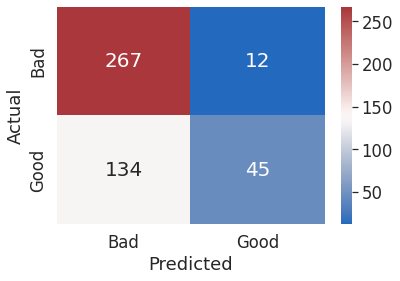

In [ ]:
#TODO: Compute the metrics.confusion_matrix using y_cv_valid and pred_basic
conf_basic = metrics.confusion_matrix(y_cv_valid,pred_basic)


#The following code plots the confusion matrix
confusion_df = pd.DataFrame(conf_basic, ['Bad', 'Good'], ['Bad', 'Good'])
confusion_df.index.name = 'Actual'
confusion_df.columns.name = 'Predicted'
sns.set(font_scale=1.5)
sns.heatmap(confusion_df,cmap="vlag", annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

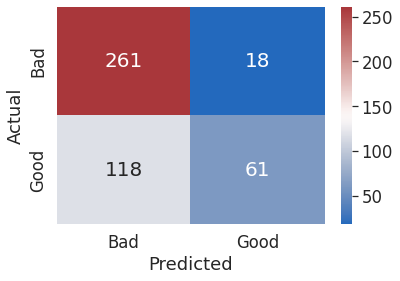

In [ ]:
#TODO: Compute the metrics.confusion_matrix using y_cv_valid and pred_tuned

conf_tuned = metrics.confusion_matrix(y_cv_valid,pred_tuned)

#The following code plots the confusion matrix
confusion_df = pd.DataFrame(conf_tuned, ['Bad', 'Good'], ['Bad', 'Good'])
confusion_df.index.name = 'Actual'
confusion_df.columns.name = 'Predicted'
sns.set(font_scale=1.5)
sns.heatmap(confusion_df,cmap="vlag", annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

---

We can see the correctly labeled samples (diagonal), and the incorrectly labeled samples (anti-diagonal). Bad water variants greatly outnunmber the good ones. We can see that the dataset is imbalanced (bad water variants are more than good ones). This is reflected in the basic model's behaviour. It is more inclined to predict water as bad water. Therefore, most of its misclassifications are predicting good water as bad (false negatives). The tuned model is clearly better at predicting! It does a reasonable job in predicting good water. The misclassifications are not as skewed.

## Precision & Recall



To further ensure that the tuned model is better, we will use **precision** and **recall** for rach class. They are a measure of how accurately our model is able to identify the relevant data.

### Precision

Simply put, precision is the ratio between the true positives and all positive predictions. In other words, of all the times we predicted positive, how many times were we correct in our prediction?

<center><img src="https://miro.medium.com/max/1360/1*ofhV4c92QGNRyfwjD3U5xA.png" width=40%/></center>

### Recall

Recall is the ratio of true positives to the total samples that are supposed to be positive. In other words, how many positives did we get correctly. 

<center><img src="https://miro.medium.com/max/1044/1*I0Yd-o2yQsHBRKFbf0rjpQ.png" width=40%/></center>

### F1 Score

The F1 score is the [harmonic mean](https://www.investopedia.com/terms/h/harmonicaverage.asp) of both precision and recall. It is easier to work with. A good F1 score is indicative of a good Precision and a good Recall value as well.

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/f1score.png" width=40%/></center>



<mark> Task: Print the output of classification_report() on both models to get the above metrics.

Hint: Here is [how to read the classification report](https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn).

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_cv_valid,pred_basic))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79       279
           1       0.79      0.25      0.38       179

    accuracy                           0.68       458
   macro avg       0.73      0.60      0.58       458
weighted avg       0.71      0.68      0.63       458



In [ ]:
print(classification_report(y_cv_valid,pred_tuned))

              precision    recall  f1-score   support

           0       0.69      0.94      0.79       279
           1       0.77      0.34      0.47       179

    accuracy                           0.70       458
   macro avg       0.73      0.64      0.63       458
weighted avg       0.72      0.70      0.67       458



For the good water, the recall of the tuned model should be better as it doesn't overfit as much as the basic model (it has less false negatives). The F1 score in general should be better for the tuned model than the basic model. Is that the case for accuracy too?

This makes sense because the second model is better at predicting good water. This means it will improve the bad water precision due the reduction in false positives there. The recall of good water will naturally improve as well.

---


<mark> Task: Read the sample submission file and set its Potability column to be the predictions of the tuned model on the X_test set. Save that to a csv using df.to_csv('file_name.csv', index=False) 

In [ ]:
submission = pd.read_csv("sample_submission.csv")

submission.Potability = model_tuned.predict(X_test)

submission.to_csv("WaterPotability_submission.csv", index=False)




[Form link](https://forms.gle/TQDADcLxtd51cgxBA)


[Kaggle link](https://www.kaggle.com/t/db38a1e90aab4ed18202e131f22b5e94)


<p align = "justify"> Congratulations! you've made it to the end of the notebook. I hope it was helpful. I tried to make it as informative as possible without being overwhelming 😁. If you want to talk about anything i am always there to help ❤.</p>

<center>

# *“Set your goals high, and don’t stop till you get there.”* 
<!-- please tell me other ways to indent :( -->
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;*―Bo Jackson*
</center>
</br>

<center>

# *“Remember to stay hydrated.”* 
<!-- please tell me other ways to indent :( -->
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;*―Mohamed Mohey*
</center>
</br>



<img src="https://genesiswatertech.com/wp-content/uploads/2019/07/Potable-Water.jpg" width=100%/><br>
</center>

## Helpful References


*   [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
*   [Understaing support vector machines](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)
*   [geeks for geeks feature scaling](https://www.geeksforgeeks.org/ml-feature-scaling-part-2/)
*   [kaggle notebook on feature scaling](https://www.kaggle.com/discdiver/guide-to-scaling-and-standardizing)
*   [Everything You Wanted to Know about the Kernel Trick](https://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick_blog_ekim_12_20_2017.pdf)
*   [SVM Hyperparameters Explained with Visualizations](https://laptrinhx.com/svm-hyperparameters-explained-with-visualizations-2305934752/)
*   [intuition on gamma](https://www.youtube.com/watch?v=m2a2K4lprQw)
*   [A simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)
*   [Precision vs. Recall – An Intuitive Guide for Every Machine Learning Person](https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/)
*   [AUC-ROC Curve in Machine Learning Clearly Explained](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/)
